
# Student Performance Indicator

### Life cycle of Machine learning Project

- Understanding the Problem Statement  
- Data Collection  
- Data Checks to perform  
- Exploratory data analysis  
- Data Pre-Processing  
- Model Training  
- Choose best model


# 1) Problem statement

- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

# 2) Data Collection

- **Dataset Source** - [Kaggle Dataset Link](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977)
- The data consists of 8 columns and 1000 rows.


## 2.1 Import Data and Required Packages

#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2.2 Load csv data as panda data frame


In [3]:
df = pd.read_csv('Data/stud.csv')




## 2.3 SHOW TOP 5 VALUES



In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 2.4 SHAPE OF THE DATASET 

In [5]:

df.shape

(1000, 8)

## DATASET INFORMATION
• gender : sex of students -> (Male/female)
• race/ethnicity : ethnicity of students -> (Group A, B, C, D, E)  
• parental level of education : parents'final education ->(bachelor's degree, some college, master's degree, associate's degree, high school)
• lunch : having lunch before test (standard or free/reduced)  
• test preparation course : complete or not complete before test  
• math score  
• reading score  
• writing score


## 3) DATA CHECKS TO PERFORM
- Check Missing values  
- Check Duplicates  
- Check data type  
- Check the number of unique values of each column  
- Check statistics of data set  
- Check various categories present in the different categorical columns

   

## 3.1 CHECK MSSSING VALUES

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### THERE ARE NO MISSING VALUES


## 3.2 CHECK DUPLICATES

In [7]:
df.duplicated()
df_cleaned = df.drop_duplicates()
df_cleaned.to_csv("Data/stud_cleaned.csv", index=False)
print("Number of duplicate rows after removal:", df_cleaned.duplicated().sum())

Number of duplicate rows after removal: 0


### THERE ARE NO DUPLICATE VALUES

## CHECK DATASETS

In [8]:
## CHECK NULL VALUES AND Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 3.3 checking the number of unique values in each column


In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

## 3.4 check statistics of data set

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## INSIGHTS
### 1. Students Perform Better in Reading & Writing Than in Math.
### 2. Strong Correlation Between Reading and Writing Scores.
### 3. Outliers Detected in Math Scores (Some Students Scored Zero).

## 3.5 EXPORING DATA

In [11]:
print("categories in 'gender' variable: ", end = " ")
print(df['gender'].unique())

print("categories in 'race/ethnicity' variable: ", end = " ")
print(df['race/ethnicity'].unique())

print("categories in' parental level of education ' variable :  ", end = " " )
print(df['parental level of education'].unique())

print("categories in 'lunch' variable: ", end = " " )
print(df['lunch'].unique())

print("categories in 'test preparation course' variable:  ",  end = " " )
print(df['test preparation course'].unique())


categories in 'gender' variable:  ['female' 'male']
categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
categories in' parental level of education ' variable :   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable:  ['standard' 'free/reduced']
categories in 'test preparation course' variable:   ['none' 'completed']


In [12]:
# Define numerical and categorical features
numerical_feature = [ feature for feature in df.columns if df[feature].dtype!= 'O']
categorical_feature  = [feature for feature in df.columns if df[feature].dtype == 'O']

#print numerical and categorical feature
print(" we have  {} numerical feauture: {}".format(len(numerical_feature),numerical_feature))
print(" we have {} categorical feature: {}".format(len(categorical_feature),categorical_feature))



 we have  3 numerical feauture: ['math score', 'reading score', 'writing score']
 we have 5 categorical feature: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


## 3.6 ADDING COLUMN FOR 'TOTAL SCORE' AND ' AVERAGE SCORE'

In [13]:
# Add total score column
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']

# Add average score column
df['average_score'] = df['total_score'] / 3

# Preview the changes
df[['math score', 'reading score', 'writing score', 'total_score', 'average_score']].head()


,math score,reading score,writing score,total_score,average_score
0,72,72,74,218,72.666667
1,69,90,88,247,82.333333
2,90,95,93,278,92.666667
3,47,57,44,148,49.333333
4,76,78,75,229,76.333333


In [14]:
reading_less_20 = df[df['reading score'] <= 20]['average_score'].count(),
writing_less_20 = df[df['writing score'] <= 20] ['average_score'].count(),
math_less_20 = df[df['math score'] <= 20] ['average_score'].count(),

print("Number of students with writing score ≤ 20:", writing_less_20)
print("Number of students with maths score ≤ 20:", math_less_20)
print("Number of students with reading score ≤ 20:", reading_less_20)


Number of students with writing score ≤ 20: (3,)
Number of students with maths score ≤ 20: (4,)
Number of students with reading score ≤ 20: (1,)


In [15]:
reading_full = df[df['reading score'] == 100]['average_score'].count()
writing_full = df[df['writing score'] == 100]['average_score'].count()
math_full = df[df['math score'] == 100]['average_score'].count()

print("Number of students with full marks in writing:", writing_full)
print("Number of students with full marks in math:", math_full)
print("Number of students with full marks in reading:", reading_full)


Number of students with full marks in writing: 14
Number of students with full marks in math: 7
Number of students with full marks in reading: 17


## INSIGHTS


- FROM ABOVE VALUES WE ANALYSED THAT STUDENTS PERFORM  WORST IN MATHS
- MOST OF THE STUDENTS PERFORM WELL IN READING

## 4. EXPLORING DATA (VISUALIZATION)

### 4.1.1 OVERALL AND GENDER-WISE DISTRIBUTION OF AVERAGE STUDENT SCORES


1. HISTOGRAM

2. KERNEL DISTRIBUTION FUNCTION


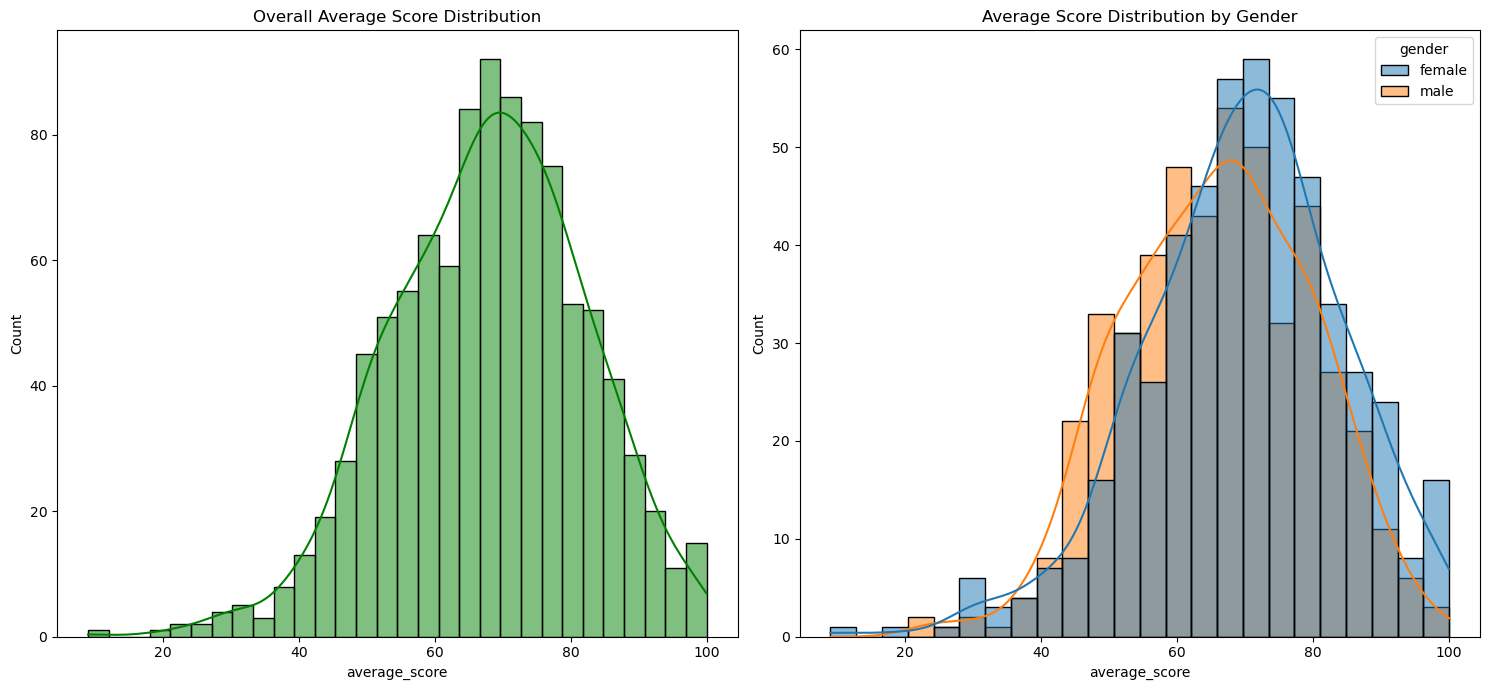

In [16]:
# Create two subplots side-by-side
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plot 1: Histogram with KDE of average score (overall)
plt.subplot(121)
sns.histplot(data=df, x='average_score', bins=30, kde=True, color='g')  # green color
plt.title("Overall Average Score Distribution")  # ⬅ Title added here

# Plot 2: KDE of average score by gender
plt.subplot(122)
sns.histplot(data=df, x='average_score', kde=True, hue='gender')  # gender-wise color separation
plt.title("Average Score Distribution by Gender")  # ⬅ Title added here

# Show the plots
plt.tight_layout()  # optional: better spacing
plt.show()


## INSIGHTS
**STUDENT PERFORMANCE ANALYSIS – AVERAGE SCORE DISTRIBUTION**

 **OVERALL AVERAGE SCORE DISTRIBUTION**
- Most students scored between 60 and 80.
- The shape of the distribution resembles a normal curve, indicating balanced performance.
- Very few students scored below 40 or above 90.

- Insight: Most students performed within a solid mid-range, with scores clustering around 70.

**AVERAGE SCORE BY GENDER**
- Female (blue) and Male (orange) students show similar score distributions.
- Both groups have a majority of scores falling between 60 and 80.
- The curves for male and female students are nearly identical.

- **Insight*: Gender does not significantly influence average scores—both male and female students perform similarly.


## 4.1.2 PERFORMANCE TRENDS BY LUNCH TYPE: OVERALL, FEMALE, AND MALE GROUPS


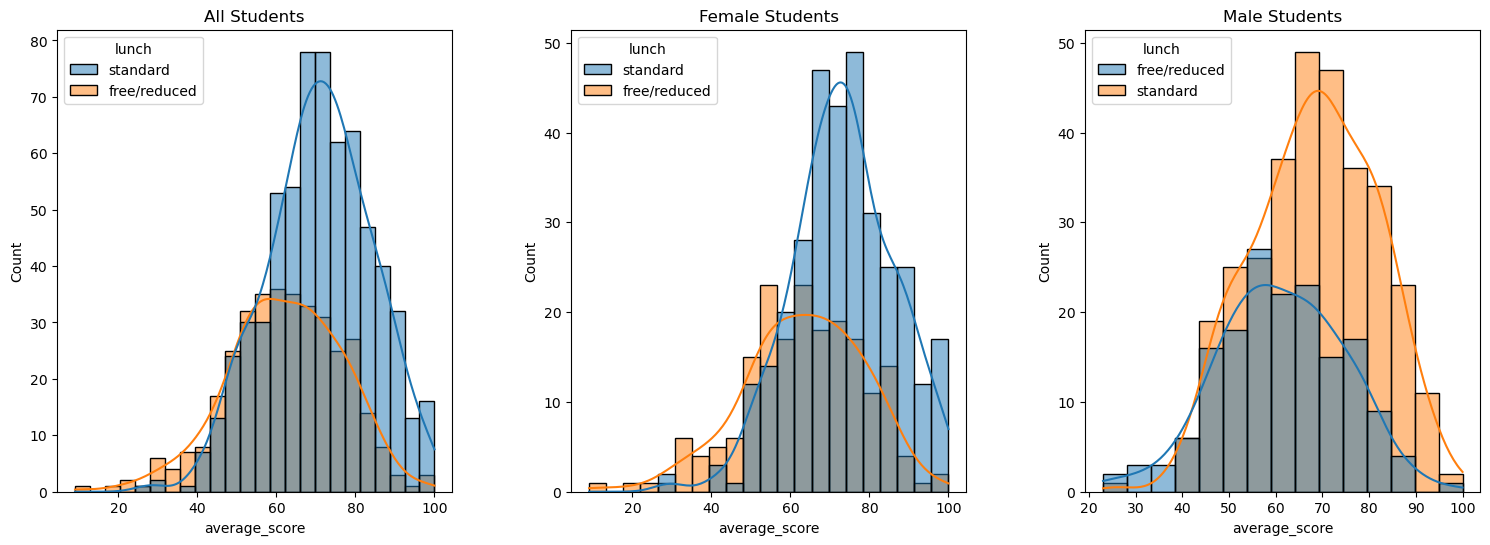

In [17]:
## Creates a figure with 1 row and 3 columns for 3 subplots
plt.figure(figsize=(25, 6))  # use plt.figure here instead of plt.subplots since you're using plt.subplot()

# Plot 1: All Students
plt.subplot(141)
sns.histplot(data=df, x='average_score', kde=True, hue='lunch')
plt.title("All Students")

# Plot 2: Female Students
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='average_score', kde=True, hue='lunch')
plt.title("Female Students")

# Plot 3: Male Students
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='average_score', kde=True, hue='lunch')
plt.title("Male Students")

# Adjust spacing between plots
plt.subplots_adjust(wspace=0.3)
plt.show()


##  INSIGHTS

-  **Histogram Insights (Lunch Type vs Scores)**
 - Standard lunch students consistently score higher, especially in all-student and female groups.
- Female students show the clearest performance advantage with standard lunch.
 - Male students show a surprising reversal: free/reduced lunch group slightly outperforms standard lunch peers.


## 4.1.3 IMPACT OF PARENTAL EDUCATION LEVEL ON STUDENT SCORES


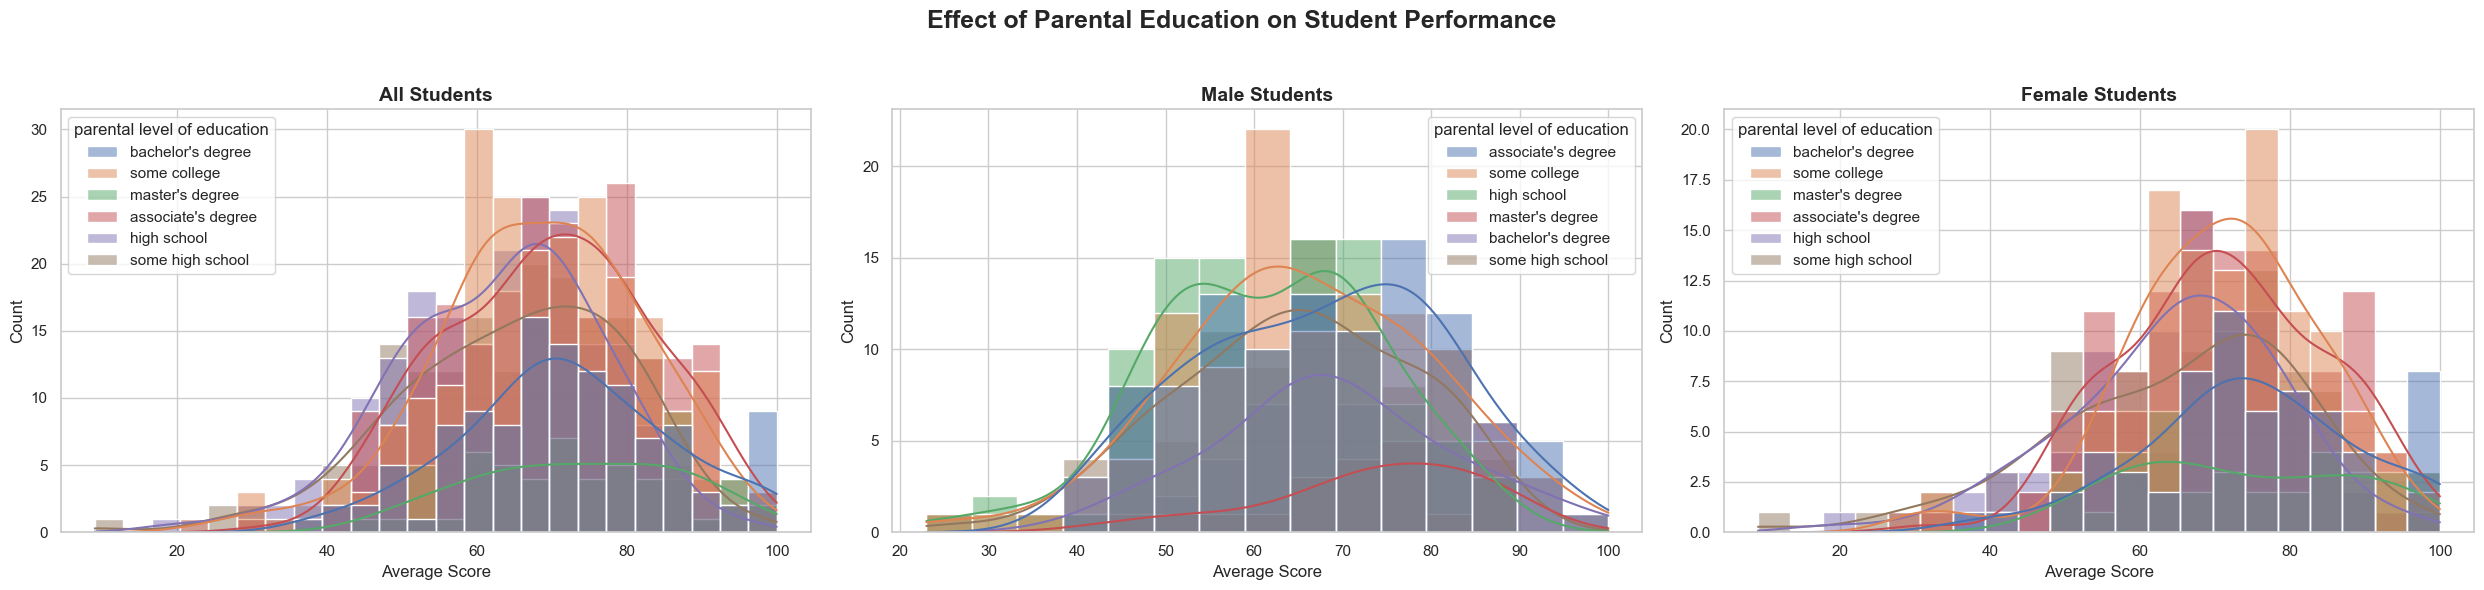

In [18]:
# Define a high-contrast custom color palette
custom_palette = {
    "bachelor's degree": "#FF5733",        # Red-Orange
    "some college": "#2E86C1",             # Blue
    "master's degree": "#28B463",          # Green
    "associate's degree": "#AF7AC5",       # Purple
    "high school": "#F1C40F",              # Yellow
    "some high school": "#E67E22"          # Orange
}

# Set seaborn global palette
sns.set_palette(sns.color_palette(list(custom_palette.values())))
# Set Seaborn style for cleaner visuals
sns.set(style="whitegrid")

# Color palette for genders
gender_colors = {'male': '#1f77b4', 'female': '#ff69b4'}

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(25, 6))
fig.suptitle("Effect of Parental Education on Student Performance", fontsize=18, fontweight='bold')

# Plot 1: All Students
sns.histplot(
    data=df, x='average_score', kde=True,
    hue='parental level of education', ax=axs[0], legend=True
)
axs[0].set_title("All Students", fontsize=14, fontweight='bold')
axs[0].set_xlabel("Average Score")
axs[0].set_ylabel("Count")
axs[0].grid(True)

# Plot 2: Male Students
sns.histplot(
    data=df[df.gender == 'male'], x='average_score', kde=True,
    hue='parental level of education', ax=axs[1], legend=True
)
axs[1].set_title("Male Students", fontsize=14, fontweight='bold')
axs[1].set_xlabel("Average Score")
axs[1].set_ylabel("Count")
axs[1].grid(True)

# Plot 3: Female Students
sns.histplot(
    data=df[df.gender == 'female'], x='average_score', kde=True,
    hue='parental level of education', ax=axs[2], legend=True
)
axs[2].set_title("Female Students", fontsize=14, fontweight='bold')
axs[2].set_xlabel("Average Score")
axs[2].set_ylabel("Count")
axs[2].grid(True)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



**INSIGHTS (FOR ALL STUDENTS)**

- "Parental education has a significant correlation with student performance."
- Students whose parents have a Master’s or Bachelor’s degree consistently perform better.
- These two education levels have peaks in the higher score zones (70–90), indicating better academic support at home.

**INSIGHTS (FOR MALE STUDENTS)**

- "Male students show broader variability in performance."
- Those with parents who completed some college or an associate’s degree dominate the middle-to-high band (60–80).
- However, no single education level dominates the very top for males.

**INSIGHTS (FOR FEMALE STUDENTS)**

- "Female students display clearer trends with parental education – the influence is more pronounced compared to males."
- Girls whose parents have a **Master’s or Bachelor’s degree** consistently achieve scores in the **higher range (75–95)**.
- The KDE curve for females shows sharper peaks, indicating **less variation and more consistent performance**.
- This suggests **better academic habits or support at home** when parental education is higher.



## 4.1.4 DISTRIBUTION OF AVERAGE SCORES BY RACE/ETHNICITY AND  GENDER

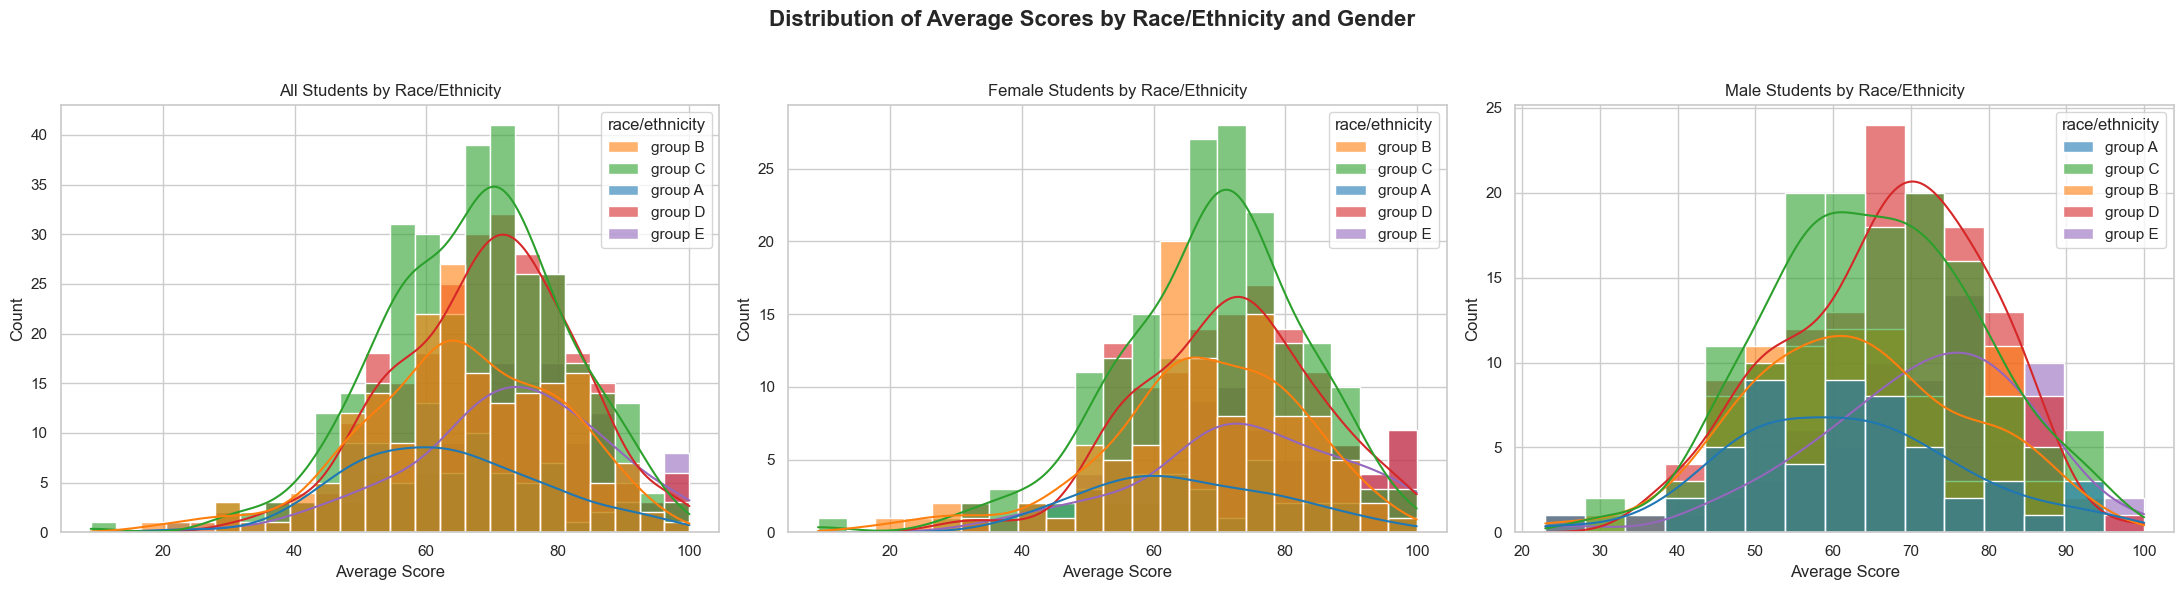

In [19]:
# Define custom high-contrast color palette for race/ethnicity
custom_palette = {
    'group A': '#1f77b4',     # Blue
    'group B': '#ff7f0e',     # Orange
    'group C': '#2ca02c',     # Green
    'group D': '#d62728',     # Red
    'group E': '#9467bd'      # Purple
}

# Set visual theme
sns.set_style("whitegrid")
sns.set_palette(list(custom_palette.values()))

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(22, 6))

# Plot 1: All students
sns.histplot(
    data=df, x='average_score', kde=True, hue='race/ethnicity',
    palette=custom_palette, ax=axs[0], alpha=0.6
)
axs[0].set_title("All Students by Race/Ethnicity")
axs[0].set_xlabel("Average Score")
axs[0].set_ylabel("Count")

# Plot 2: Female students
sns.histplot(
    data=df[df.gender == 'female'], x='average_score', kde=True, hue='race/ethnicity',
    palette=custom_palette, ax=axs[1], alpha=0.6
)
axs[1].set_title("Female Students by Race/Ethnicity")
axs[1].set_xlabel("Average Score")
axs[1].set_ylabel("Count")

# Plot 3: Male students
sns.histplot(
    data=df[df.gender == 'male'], x='average_score', kde=True, hue='race/ethnicity',
    palette=custom_palette, ax=axs[2], alpha=0.6
)
axs[2].set_title("Male Students by Race/Ethnicity")
axs[2].set_xlabel("Average Score")
axs[2].set_ylabel("Count")

# Super title and layout fix
fig.suptitle("Distribution of Average Scores by Race/Ethnicity and Gender", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

###  Insights from Race/Ethnicity and Gender-Based Analysis

---

####  Insights (All Students)
- **Group E and D** students generally outperform other groups, with score distributions skewed toward the higher range (70–90+).
- **Group B and C** are the largest in population and show balanced performance with peaks around 65–75.
- **Group A** students show lower performance, peaking around ~60, highlighting the need for additional support or interventions.

---

####  Insights (Female Students)
- **Female students from Group B and D** have the highest performance, with scores mostly in the **75–90** range.
- **Group A females** score significantly lower on average, with peaks between **50–60**.
- **Group C and E females** show average performance but are more consistent than males.
- In general, **female students across all groups outperform male students**, indicating possible differences in learning patterns or academic engagement.

---

####  Insights (Male Students)
- **Male students show greater variability** in their performance across all race/ethnicity groups.
- **Group C and D males** perform moderately well with scores in the **70–80** range but have wider spread compared to females.
- **Group A males** are notably underperforming, with most scores in the **50–60** range.
- **Group E males** perform well but represent a smaller portion of the dataset.
- Overall, **no single group dominates** among males, and there's more inconsistency compared to females.

---

####  Summary for Stakeholders
- **Race/Ethnicity has a visible impact** on student performance, particularly among female students.
- **Groups D and E** are top-performing; **Group A** students (both genders) may benefit from additional academic support.
- The **gender gap** is evident, with **females consistently outperforming males**, suggesting the need for gender-sensitive learning strategies.


## 4.1.5  SUBJECT-WISE SCORE DISTRIBUTIONS USING VIOLIN PLOTS



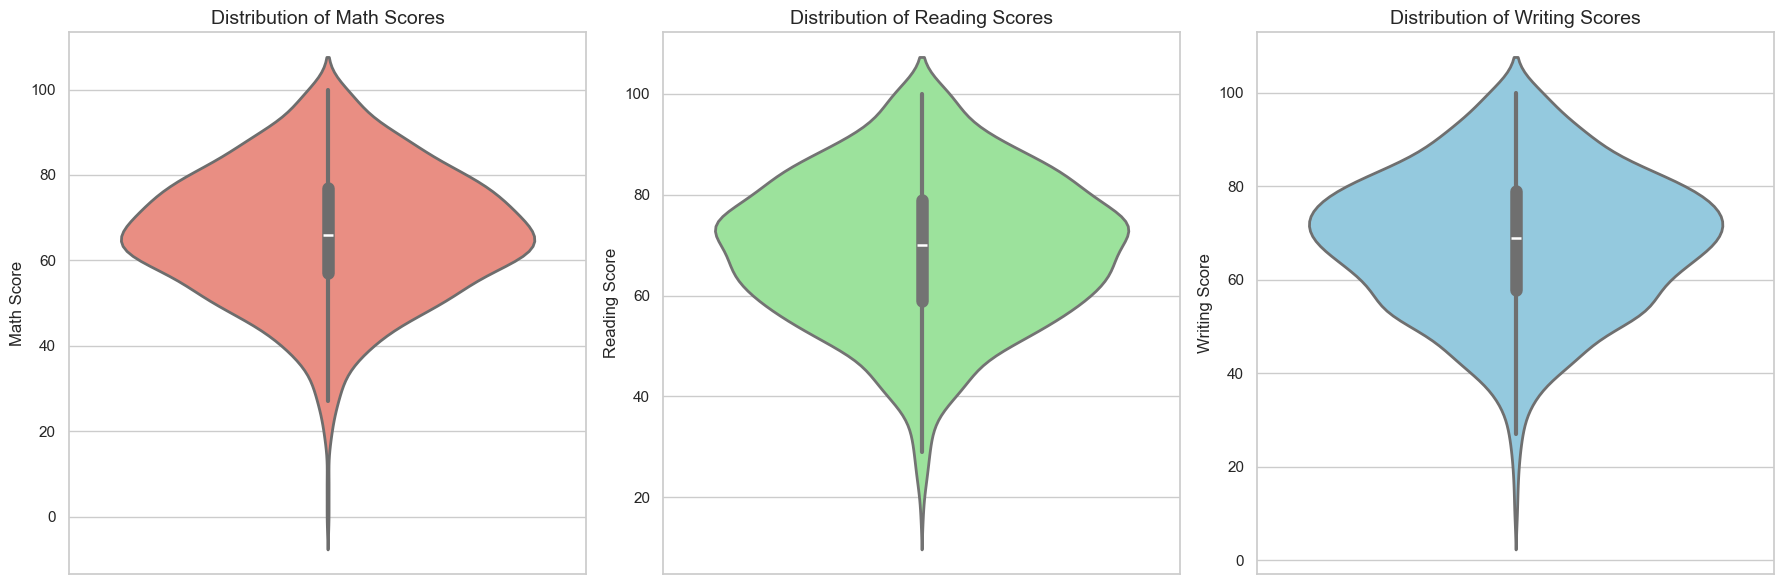

In [20]:
# Set overall theme
sns.set(style="whitegrid")

# Create a figure with 1 row and 3 columns
plt.figure(figsize=(18, 6))

# Plot 1: Math Score Distribution
plt.subplot(1, 3, 1)
plt.title('Distribution of Math Scores', fontsize=14)
sns.violinplot(y='math score', data=df, color='salmon', linewidth=2)
plt.ylabel('Math Score')

# Plot 2: Reading Score Distribution
plt.subplot(1, 3, 2)
plt.title('Distribution of Reading Scores', fontsize=14)
sns.violinplot(y='reading score', data=df, color='lightgreen', linewidth=2)
plt.ylabel('Reading Score')

# Plot 3: Writing Score Distribution
plt.subplot(1, 3, 3)
plt.title('Distribution of Writing Scores', fontsize=14)
sns.violinplot(y='writing score', data=df, color='skyblue', linewidth=2)
plt.ylabel('Writing Score')

# Show all plots
plt.tight_layout()
plt.show()

### Insights: Distribution of Subject-wise Scores

- **Math Scores**:
  - Shows a slightly wider spread, with a noticeable number of students scoring below 50.
  - Few outliers at the lower end suggest students struggling more in math.

- **Reading Scores**:
  - Densely packed in the 60–90 range.
  - Fewer low outliers, indicating stronger overall reading performance.

- **Writing Scores**:
  - Very similar to reading scores.
  - Dense middle, indicating consistent average performance among students.

 **Observation**: Students generally perform better and more consistently in **reading and writing** than in **math**, where variability and underperformance are more common.


## 4.1.6 MULTIVARIATE ANALYSIS USING PIE PLOT

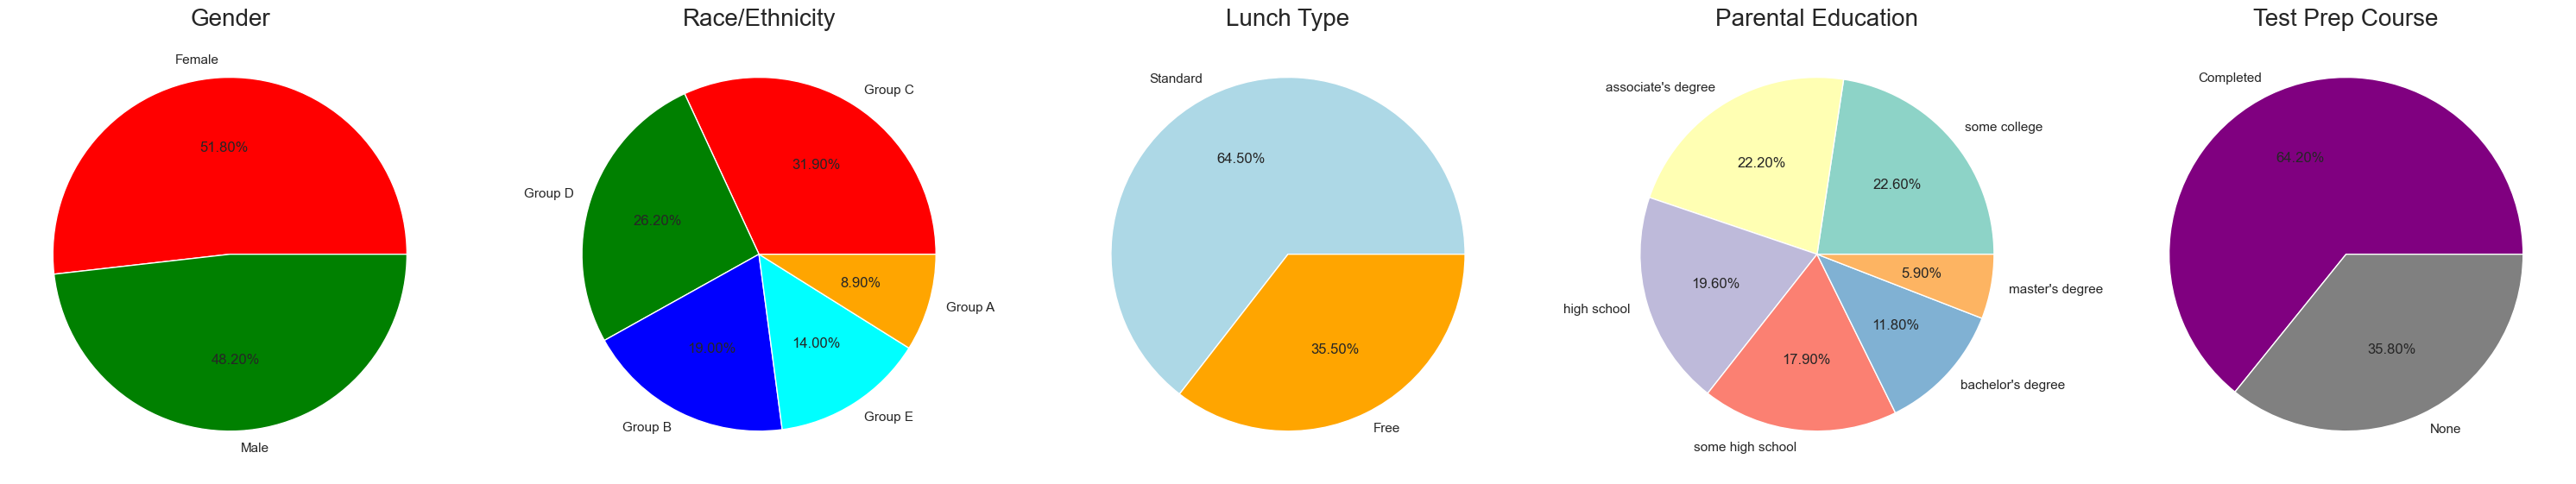

In [21]:
plt.rcParams['figure.figsize'] = (30, 12)

# Gender
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = ['Female', 'Male']
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

# Race/Ethnicity
plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = ['Group C', 'Group D', 'Group B', 'Group E', 'Group A']
color = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

# Lunch
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = ['Standard', 'Free']
color = ['lightblue', 'orange']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Lunch Type', fontsize=20)
plt.axis('off')

# (Optional) Add remaining charts:
# Parental Level of Education
plt.subplot(1, 5, 4)
size = df['parental level of education'].value_counts()
labels = size.index
color = sns.color_palette('Set3')[0:6]
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

# Test Preparation Course
plt.subplot(1, 5, 5)
size = df['test preparation course'].value_counts()
labels = ['Completed', 'None']
color = ['purple', 'gray']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Test Prep Course', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()

###  Multivariate Demographic Insights (Pie Charts)

- **Gender**: Balanced distribution, though females slightly outnumber males.
- **Race/Ethnicity**: Group C has the largest representation; Group A is the smallest.
- **Lunch Type**: Majority of students have **standard lunch**, which may correlate with better performance.
- **Parental Education**: Most parents fall into "some college" or "associate's degree" — fewer hold Master’s degrees.
- **Test Preparation**: A significant portion of students **did not complete** the prep course, which may impact scores.


## 4.2 FEATURE WISE VISUALIZATION



## 4.2.1 GENDER COLUMN
- HOW IS THE DISTRIBUTION OF GENDER?
  
- IS GENDER HAS ANY IMPACT ON STUDENTS'S PERFORMANCE


### UNIVARIATE ANALYSIS(HOW IS THE DISTRIBUTION OF GENDER?)

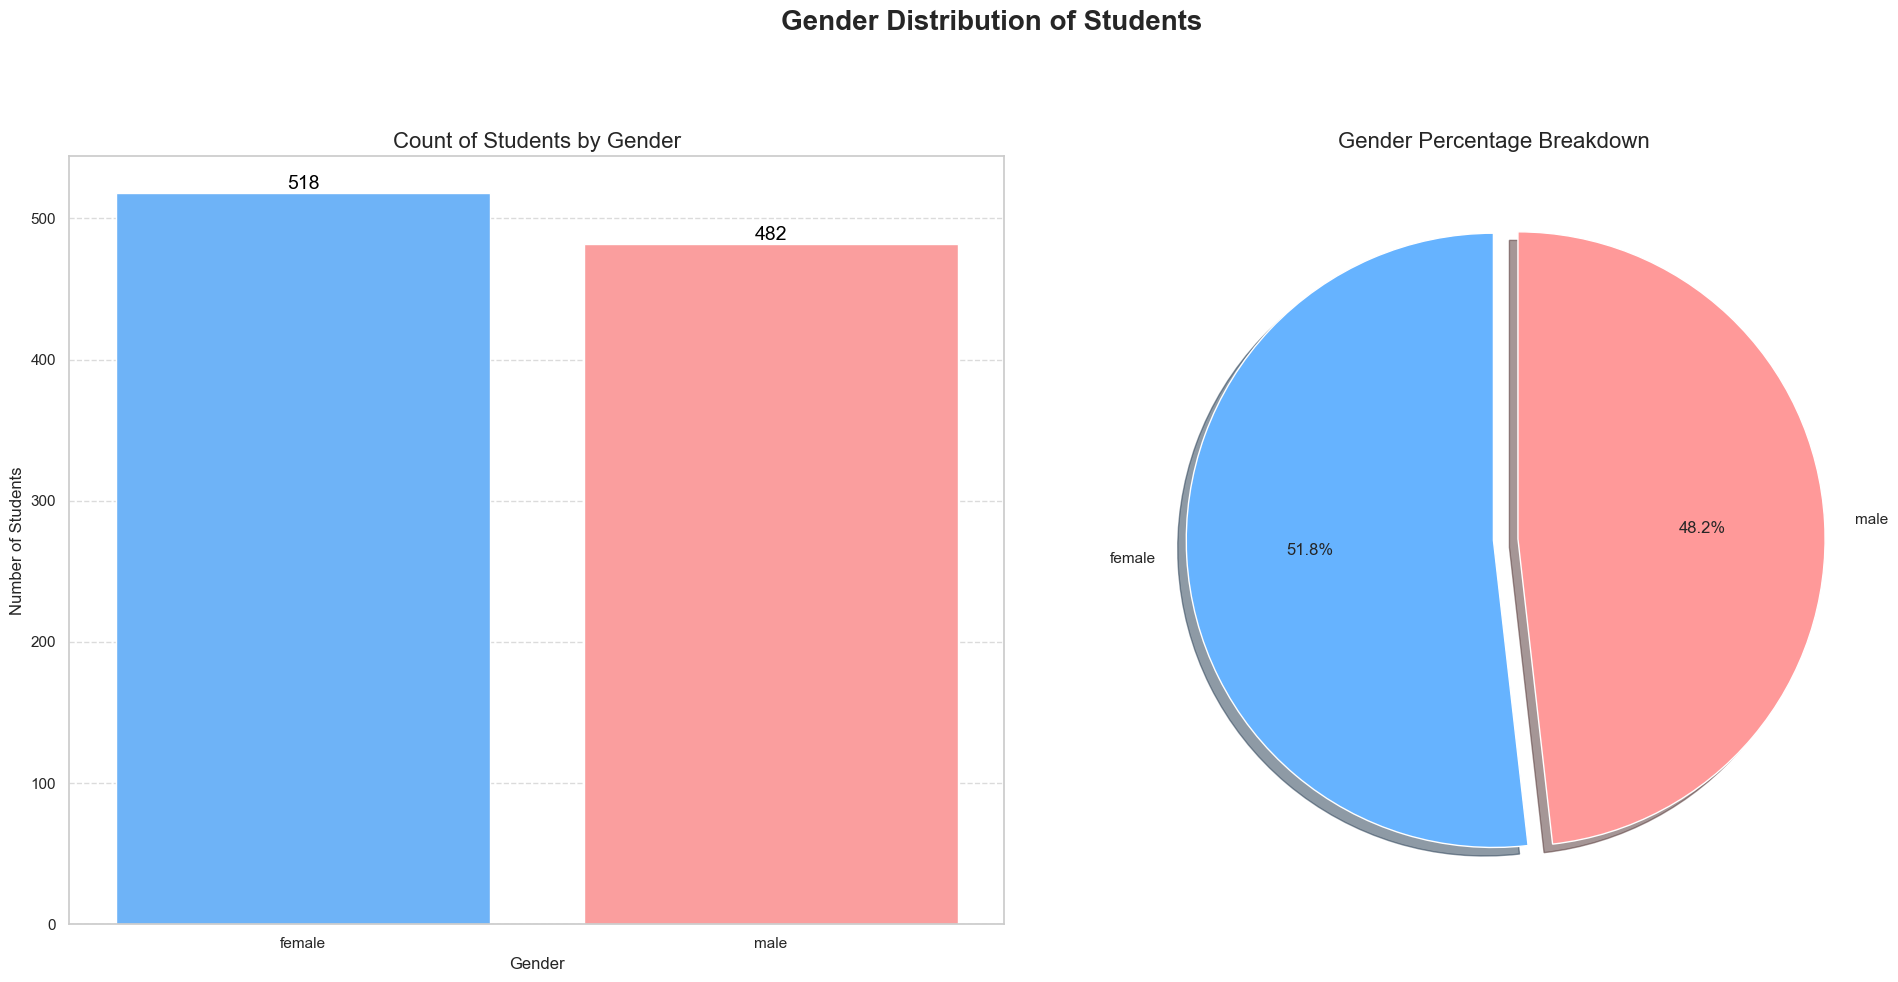

In [22]:
## GENDER DISTRIBUTION ANALYSIS – BAR AND PIE CHART COMPARISON

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots for bar and pie chart
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle("Gender Distribution of Students", fontsize=20, fontweight='bold')

# --- Plot 1: Bar Chart ---
sns.countplot(x='gender', data=df, palette=['#66b3ff', '#ff9999'], ax=ax[0], saturation=0.9)
ax[0].set_title("Count of Students by Gender", fontsize=16)
ax[0].set_xlabel("Gender", fontsize=12)
ax[0].set_ylabel("Number of Students", fontsize=12)
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels on each bar
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', fontsize=14, label_type='edge')

# --- Plot 2: Pie Chart ---
gender_counts = df['gender'].value_counts()
ax[1].pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    explode=[0, 0.08],
    shadow=True,
    colors=['#66b3ff', '#ff9999'],
    startangle=90
)
ax[1].set_title("Gender Percentage Breakdown", fontsize=16)

# Final layout adjustments
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()

## BIVARIATE ANALYSIS (DOES GENDER HAVE ANY IMPACT ON STUDENTS PERFORMANCE? )

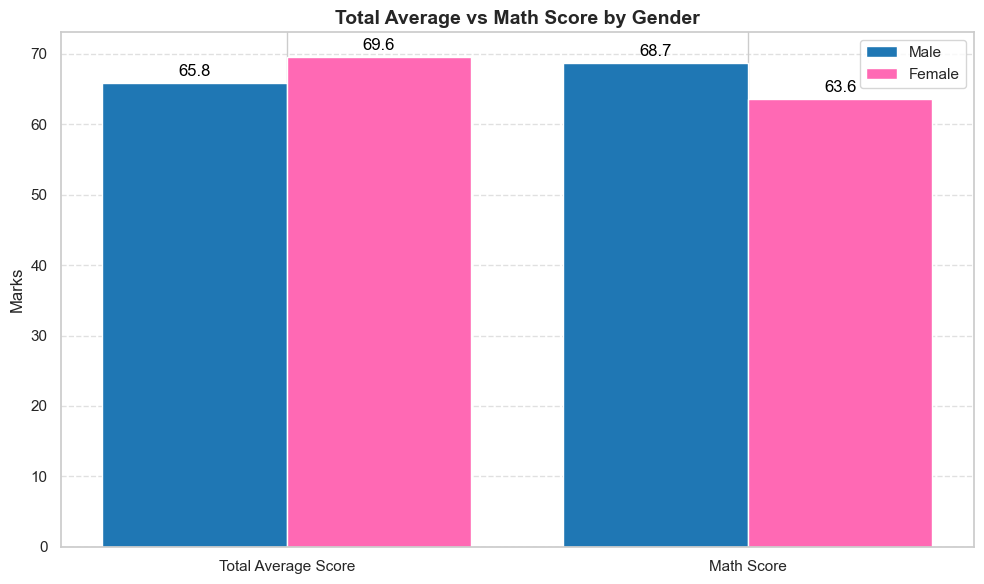

In [23]:
## COMPARING TOTAL AVERAGE VS MATH AVERAGE SCORES FOR MALE AND FEMALE STUDENTS



gender_group = df.groupby('gender').mean(numeric_only=True)

# Define bar categories
X = ['Total Average Score', 'Math Score']
X_axis = np.arange(len(X))

# Extract gender-wise scores using .loc for better clarity
female_scores = [
    gender_group.loc['female', 'average_score'],
    gender_group.loc['female', 'math score']
]

male_scores = [
    gender_group.loc['male', 'average_score'],
    gender_group.loc['male', 'math score']
]

# Plot configuration
plt.figure(figsize=(10, 6))

# Plot bars for both genders
plt.bar(X_axis - 0.2, male_scores, width=0.4, label='Male', color='#1f77b4')
plt.bar(X_axis + 0.2, female_scores, width=0.4, label='Female', color='#ff69b4')

# Add data labels on top of bars
for i in range(len(X_axis)):
    plt.text(X_axis[i] - 0.2, male_scores[i] + 1, f"{male_scores[i]:.1f}", ha='center', color='black')
    plt.text(X_axis[i] + 0.2, female_scores[i] + 1, f"{female_scores[i]:.1f}", ha='center', color='black')

# Axis labels, title, legend, and styling
plt.xticks(X_axis, X)
plt.ylabel("Marks", fontsize=12)
plt.title("Total Average vs Math Score by Gender", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()


###  Gender-Based Score Insights (Bar Plot)

- **Female students outperform male students** in both average total scores and math scores.
- The difference is more prominent in the **total average**, suggesting that females score consistently higher across subjects.
- This could be a factor of better reading/writing scores influencing their overall average.


## 4.2.2 RACE/ETHNICITY COLUMN

- HOW IS GROUP-WISE DISTRIBUTION?
- DOES RACE/ETHNICITY have any IMPACT ON STUDENT'S PERFORMANCE?

## UNIVARIATE ANALYSIS(HOW IS GROUP-WISE DITRIBUTION?)

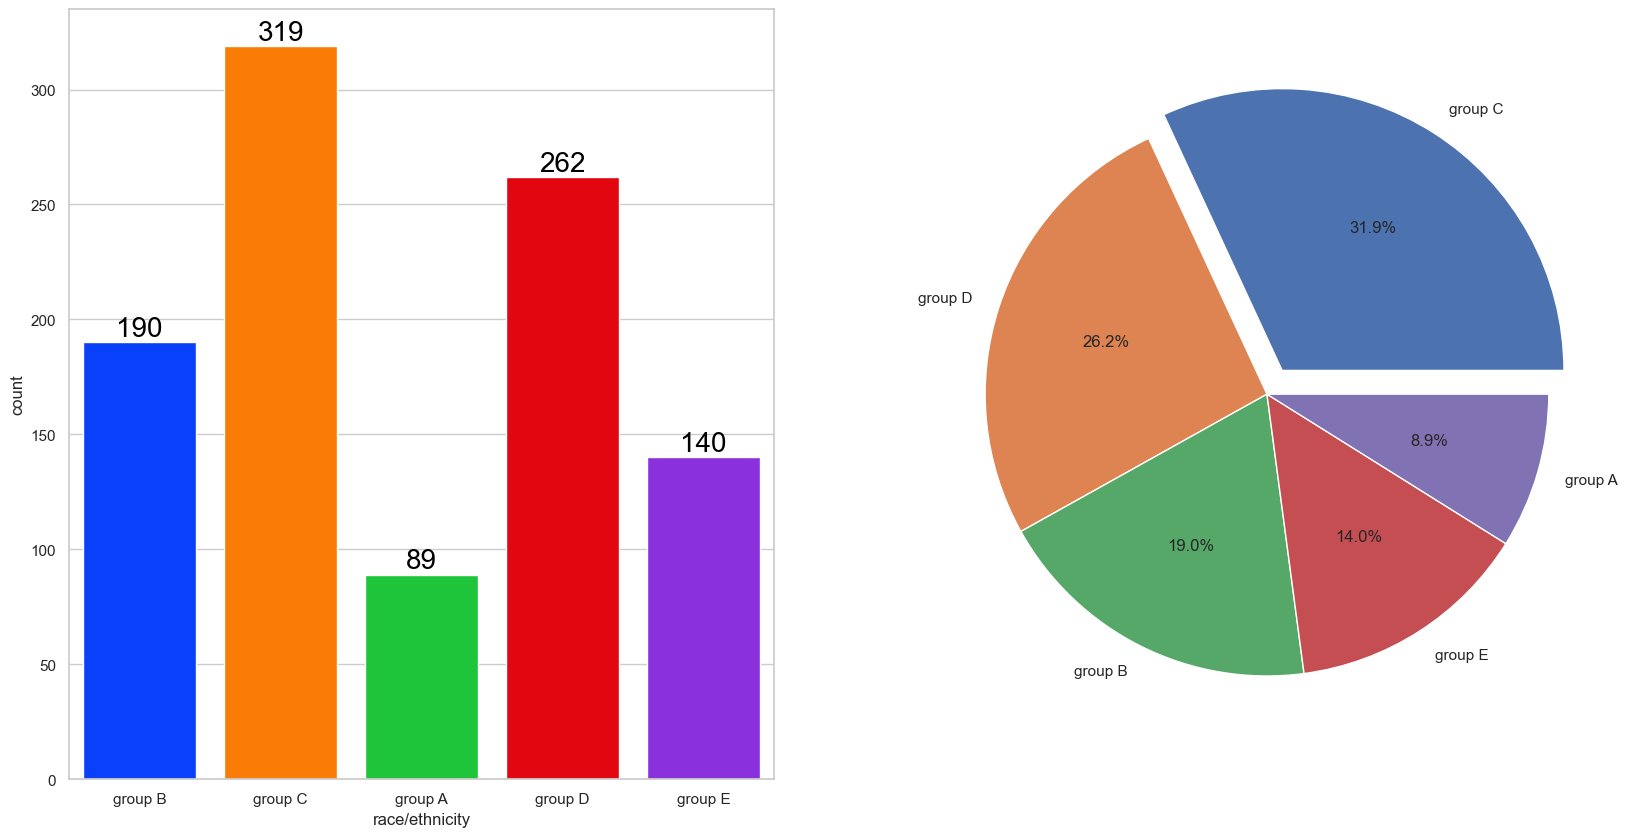

In [24]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Count plot of race/ethnicity
sns.countplot(x=df['race/ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Pie chart of race/ethnicity distribution
plt.pie(
    x=df['race/ethnicity'].value_counts(),
    labels=df['race/ethnicity'].value_counts().index,
    explode=[0.1, 0, 0, 0, 0],
    autopct='%1.1f%%'
)

plt.show()

###  INSIGHT

- **Group C** has the **highest number of students**, making up the largest portion of the dataset.
- **Group A** is the **smallest group**, representing the least number of students.
- The **countplot** shows absolute numbers, while the **pie chart** gives a clear view of the **proportional distribution** across all five groups.
- These differences in group size should be considered during model evaluation, as **imbalanced groups** may affect learning outcomes or prediction accuracy.

 **Note**: When comparing academic performance by group, Group C will dominate simply due to size unless results are normalized.


## BIVARIATE ANALYSIS(DOES RACE/ETHNICITY HAVE ANY IMPACT ON STUDENT'S  PERFORMANCE?)

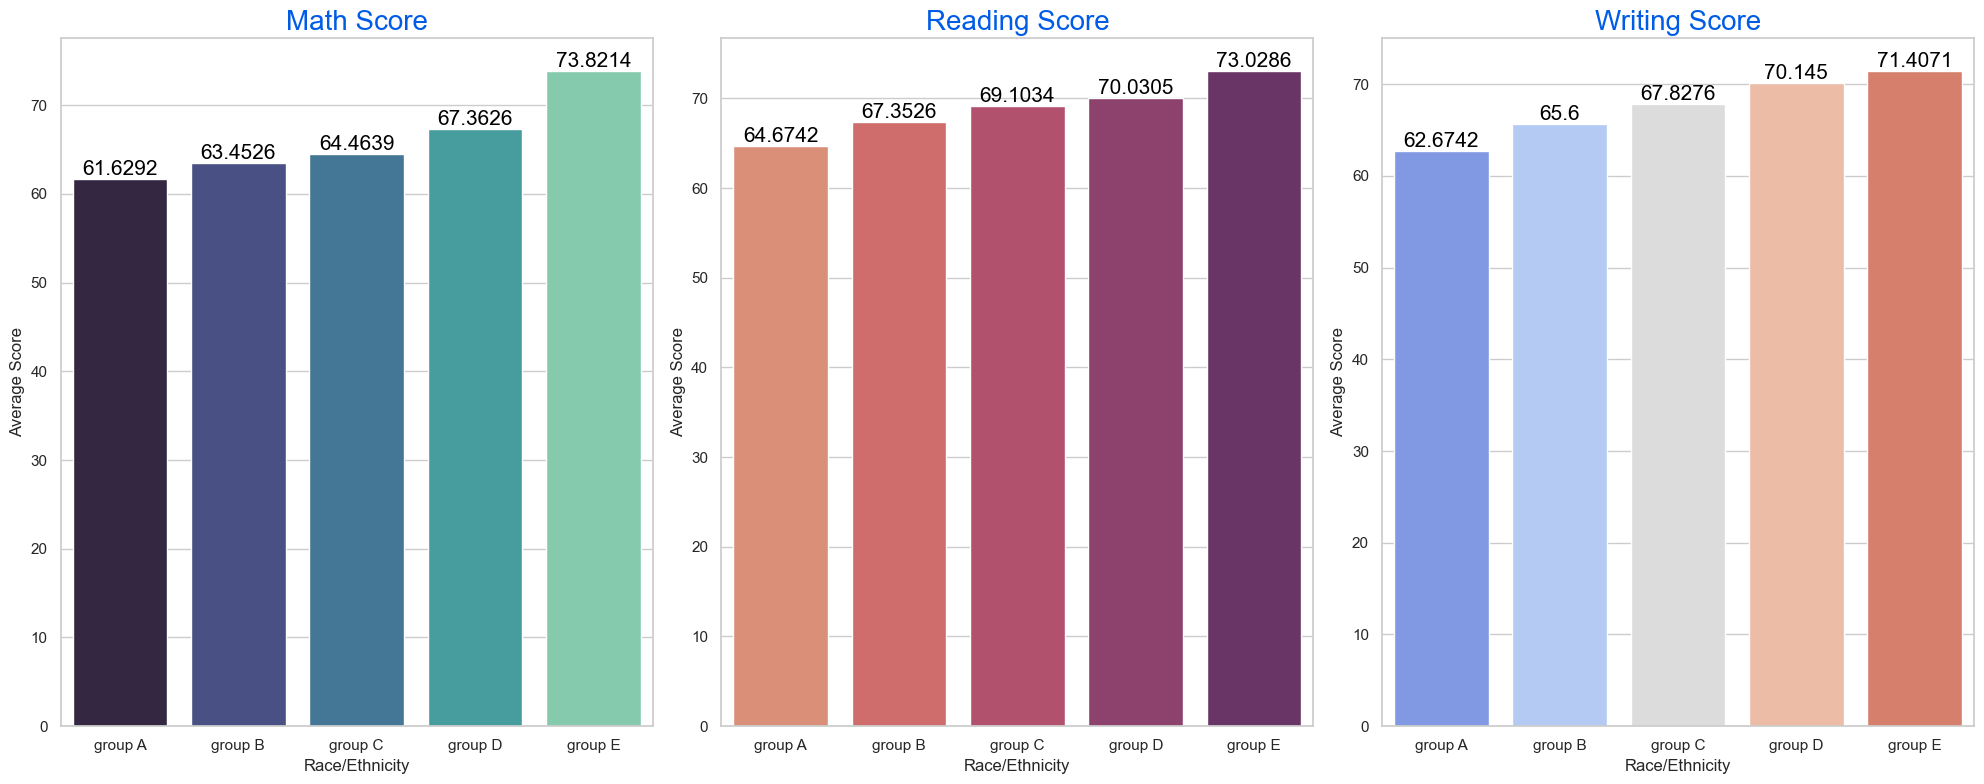

In [25]:
## GROUP-WISE AVERAGE SCORES IN MATH, READING, AND WRITING BY RACE/ETHNICITY

# Group the dataset by race/ethnicity
Group_data2 = df.groupby('race/ethnicity')

# Create subplots for three subjects
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Math Score Plot
sns.barplot(
    x=Group_data2['math score'].mean().index,
    y=Group_data2['math score'].mean().values,
    palette='mako',
    ax=ax[0]
)
ax[0].set_title('Math Score', color='#005ce6', size=20)
ax[0].set_ylabel('Average Score')
ax[0].set_xlabel('Race/Ethnicity')
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Reading Score Plot
sns.barplot(
    x=Group_data2['reading score'].mean().index,
    y=Group_data2['reading score'].mean().values,
    palette='flare',
    ax=ax[1]
)
ax[1].set_title('Reading Score', color='#005ce6', size=20)
ax[1].set_ylabel('Average Score')
ax[1].set_xlabel('Race/Ethnicity')
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# Writing Score Plot
sns.barplot(
    x=Group_data2['writing score'].mean().index,
    y=Group_data2['writing score'].mean().values,
    palette='coolwarm',
    ax=ax[2]
)
ax[2].set_title('Writing Score', color='#005ce6', size=20)
ax[2].set_ylabel('Average Score')
ax[2].set_xlabel('Race/Ethnicity')
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

# Layout adjustment
plt.tight_layout()
plt.show()

###  Race/Ethnicity-Based Student Distribution – Insights

- **Group C** has the **highest number of students**, making up the largest portion of the dataset.
- **Group A** is the **smallest group**, representing the least number of students.
- The **countplot** shows absolute numbers, while the **pie chart** gives a clear view of the **proportional distribution** across all five groups.
- These differences in group size should be considered during model evaluation, as **imbalanced groups** may affect learning outcomes or prediction accuracy.

 **Note**: When comparing academic performance by group, Group C will dominate simply due to size unless results are normalized.


## 4.2.3 PARENTAL LEVEL OF EDUCATION COLUMN


- WHAT IS THE EDUCATIONAL BACKGROUND OF STUDENT'S PARENTS?
- DOES PARENTAL  EDUCATION HAS ANY IMPACT ON STUDENT'S PERFORMANCE?
  

## UNIVARIATE ANALYSIS (WHAT IS THE EDUCATIONAL BACKGROUND OF STUDENT'S PARENTS?)

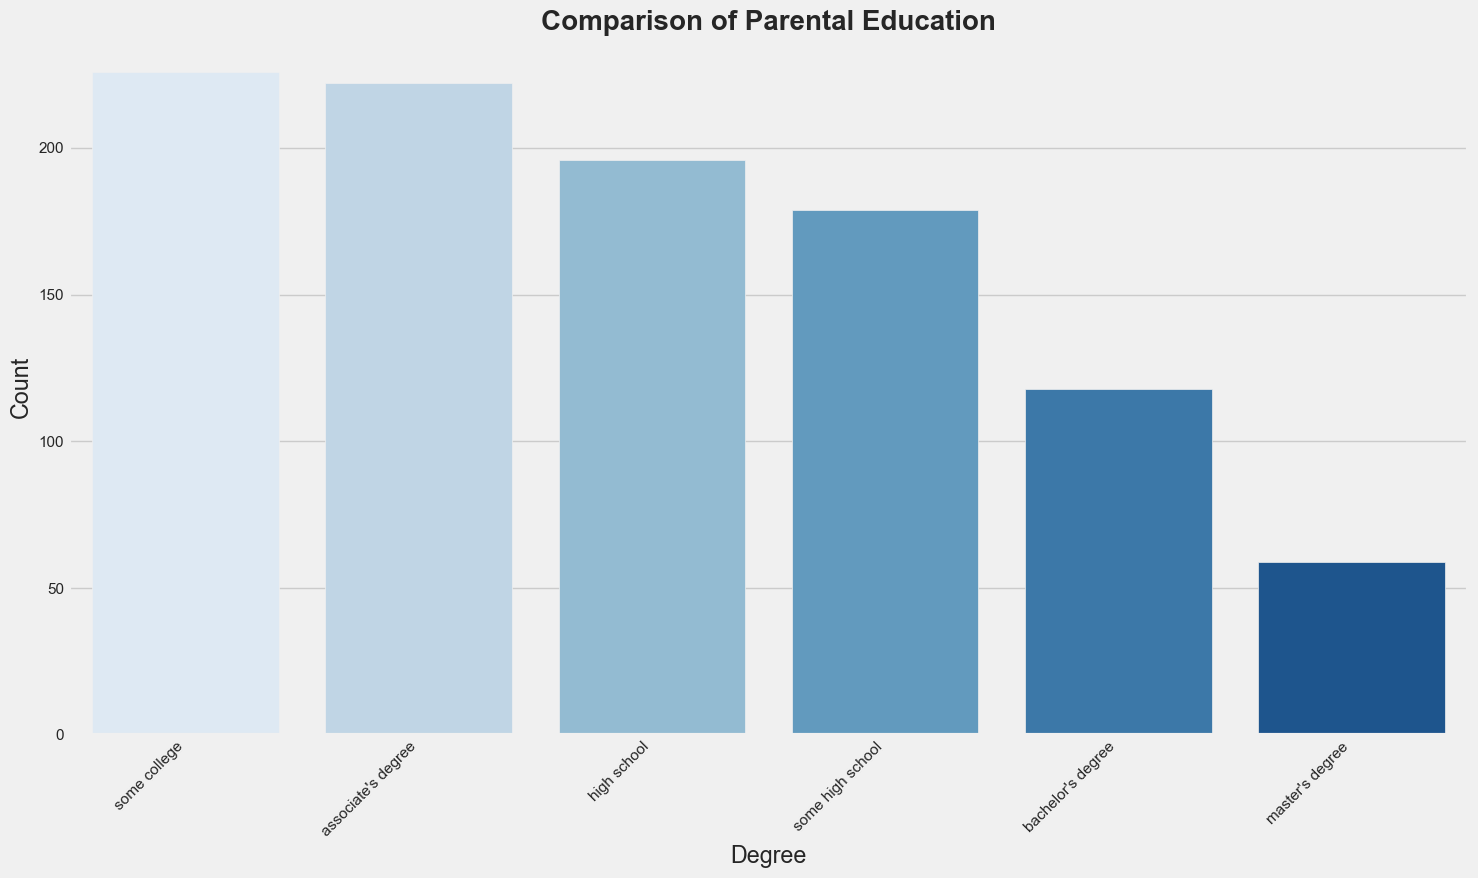

In [26]:


# Set figure size and style
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

# Create the count plot
sns.countplot(
    data=df,
    x='parental level of education',
    palette='Blues',
    order=df['parental level of education'].value_counts().index  # optional: sorts bars by count
)

# Customize plot
plt.title('Comparison of Parental Education', fontsize=20, fontweight='bold')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Improves readability if labels are long

# Show plot
plt.tight_layout()
plt.show()


###  Comparison of Parental Education – Insights

- **Most parents** of the students in the dataset have **some college education**.
- **Fewer students** come from homes where parents hold a **Master's or Bachelor’s degree**, suggesting limited representation of higher education levels.
- This imbalance may influence the overall performance trends if parental education is a key factor in student success.



## BIVARIATE ANALYSIS(DOES PARENTAL EDUCATION HAS ANY IMPACT ON STUDENT'S PERFORMANCE?) 

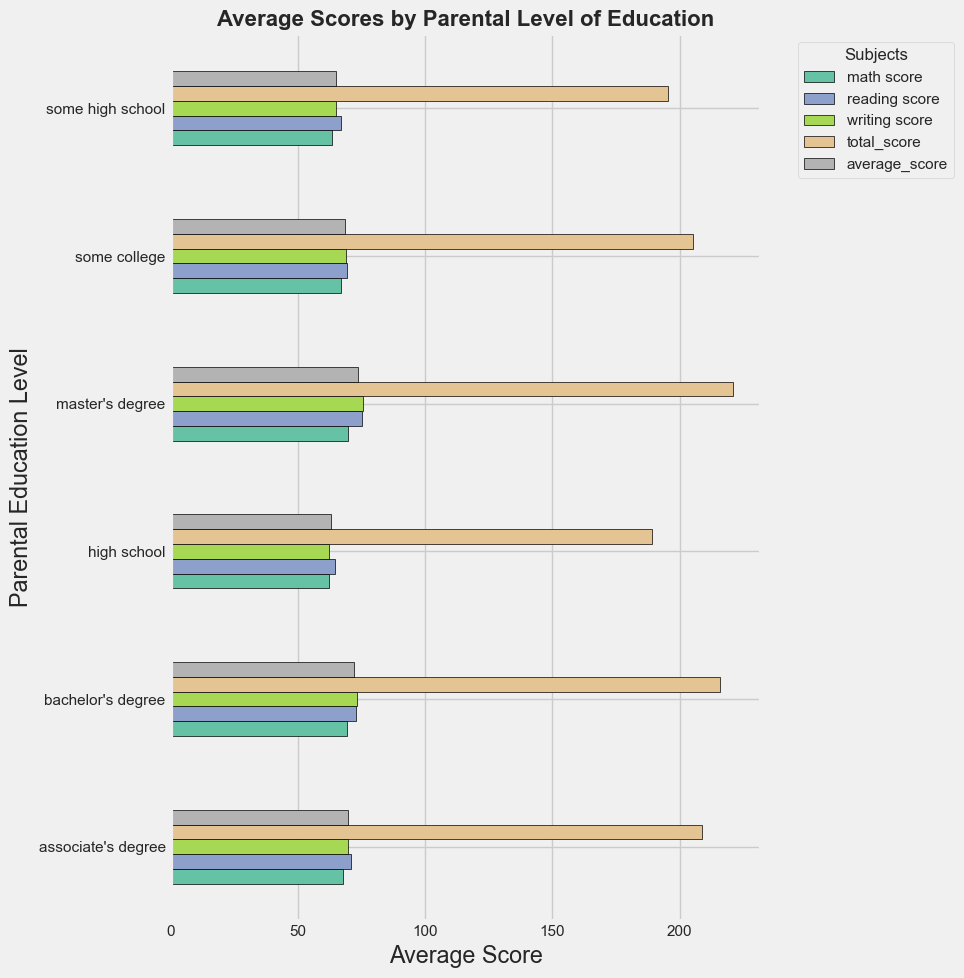

In [27]:




# Select only numeric columns for aggregation
numeric_df = df.select_dtypes(include='number')

# Concatenate the 'parental level of education' column for grouping
df_numeric = pd.concat([df[['parental level of education']], numeric_df], axis=1)

# Group and calculate mean scores
avg_scores_by_education = df_numeric.groupby('parental level of education').mean()

# Plot horizontal bar chart
avg_scores_by_education.plot(
    kind='barh',
    figsize=(10, 10),
    colormap='Set2',
    edgecolor='black'
)

# Add legend, labels, and formatting
plt.legend(title='Subjects', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Average Scores by Parental Level of Education", fontsize=16, fontweight='bold')
plt.xlabel("Average Score")
plt.ylabel("Parental Education Level")
plt.tight_layout()
plt.show()


## Insights: Average Scores Based on Parental Education Level

- **Students whose parents have higher educational qualifications (such as a Master's or Bachelor's degree) consistently achieve higher average scores** across all three subjects—Mathematics, Reading, and Writing.

- **Lower parental education levels (such as high school or some high school) are associated with comparatively lower student performance**. This suggests that the academic background of parents may have a significant influence on a student's academic success.

- **The trend of higher performance with increased parental education is consistent across all subjects**, indicating that parental education is a strong and reliable predictor of student achievement.

- **Students with well-educated parents may benefit from more effective academic support at home**, including better study environments, access to resources, and greater emphasis on academic discipline.


## 4.2.4 LUNCH COLUMN

- WHAT TYPE OF LUNCH IS COMMON AMONG STUDENTS?
- WHAT IS THE EFFECT OF LUNCH TYPE ON TEST RESULTS?

## UNIVARIATE ANALYSIS(WHAT TYPE OF LUNCH  IS COMMON AMONG STUDENTS?)

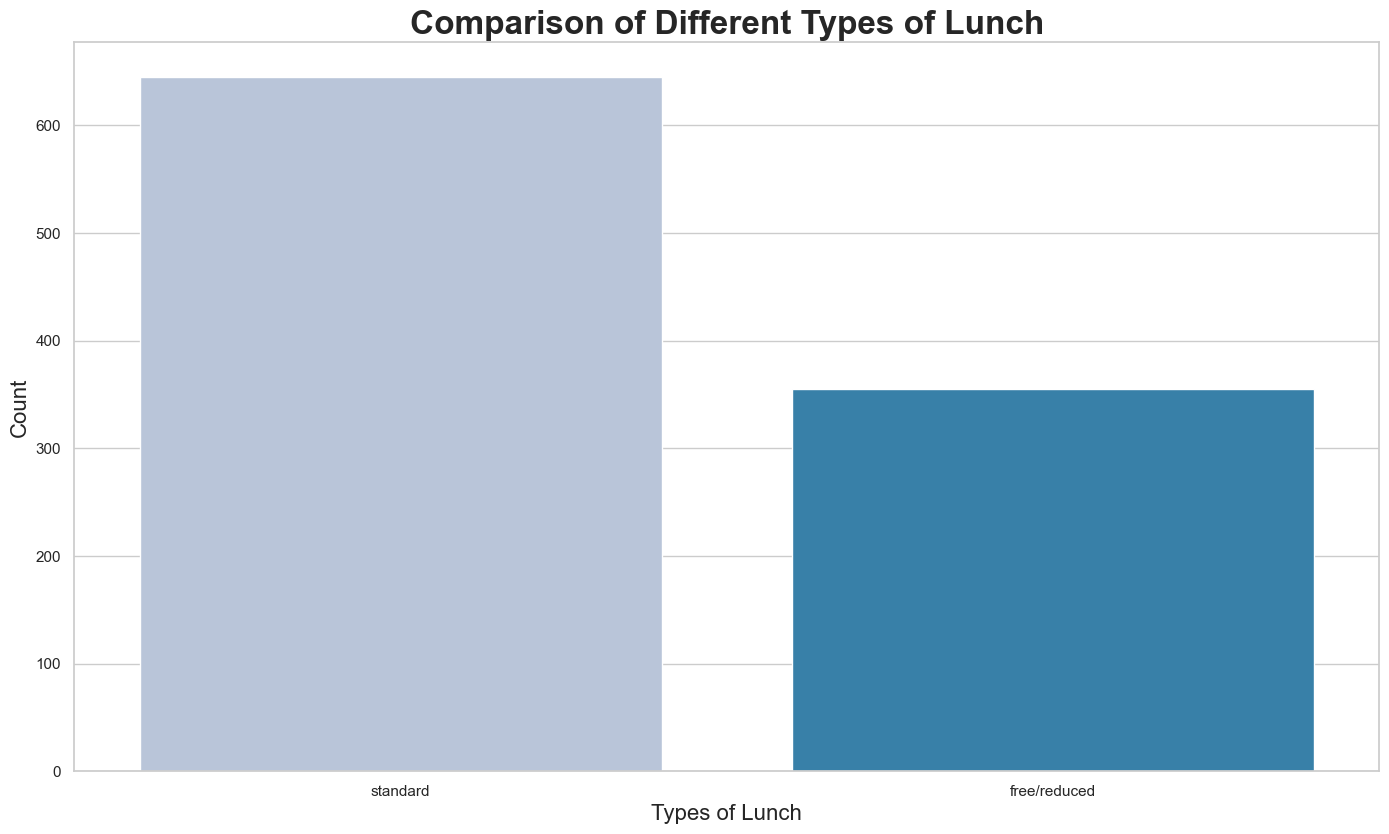

In [31]:



# Set Seaborn theme and figure size
sns.set_theme(style="whitegrid")  # use a valid seaborn style
plt.figure(figsize=(15, 9))

# Create count plot for 'lunch' column
sns.countplot(data=df, x='lunch', palette='PuBu')

# Add title and axis labels
plt.title('Comparison of Different Types of Lunch', fontsize=24, fontweight='bold')
plt.xlabel('Types of Lunch', fontsize=16)
plt.ylabel('Count', fontsize=16)

# Show the plot
plt.show()


# Lunch Type Distribution Summary


## Key Insights

- **Standard lunch** is the most common among students, showing a clear majority.
- **Free/reduced lunch** is less frequent, which may reflect economic differences or access issues.
- This imbalance is important and could influence academic outcomes. Students from different lunch groups may have different needs or performance levels.



## BIVARIATE ANALYSIS(WHAT ARE THE EFFECTS OF LUNCH TYPE ON TEST'S RESULTS?)

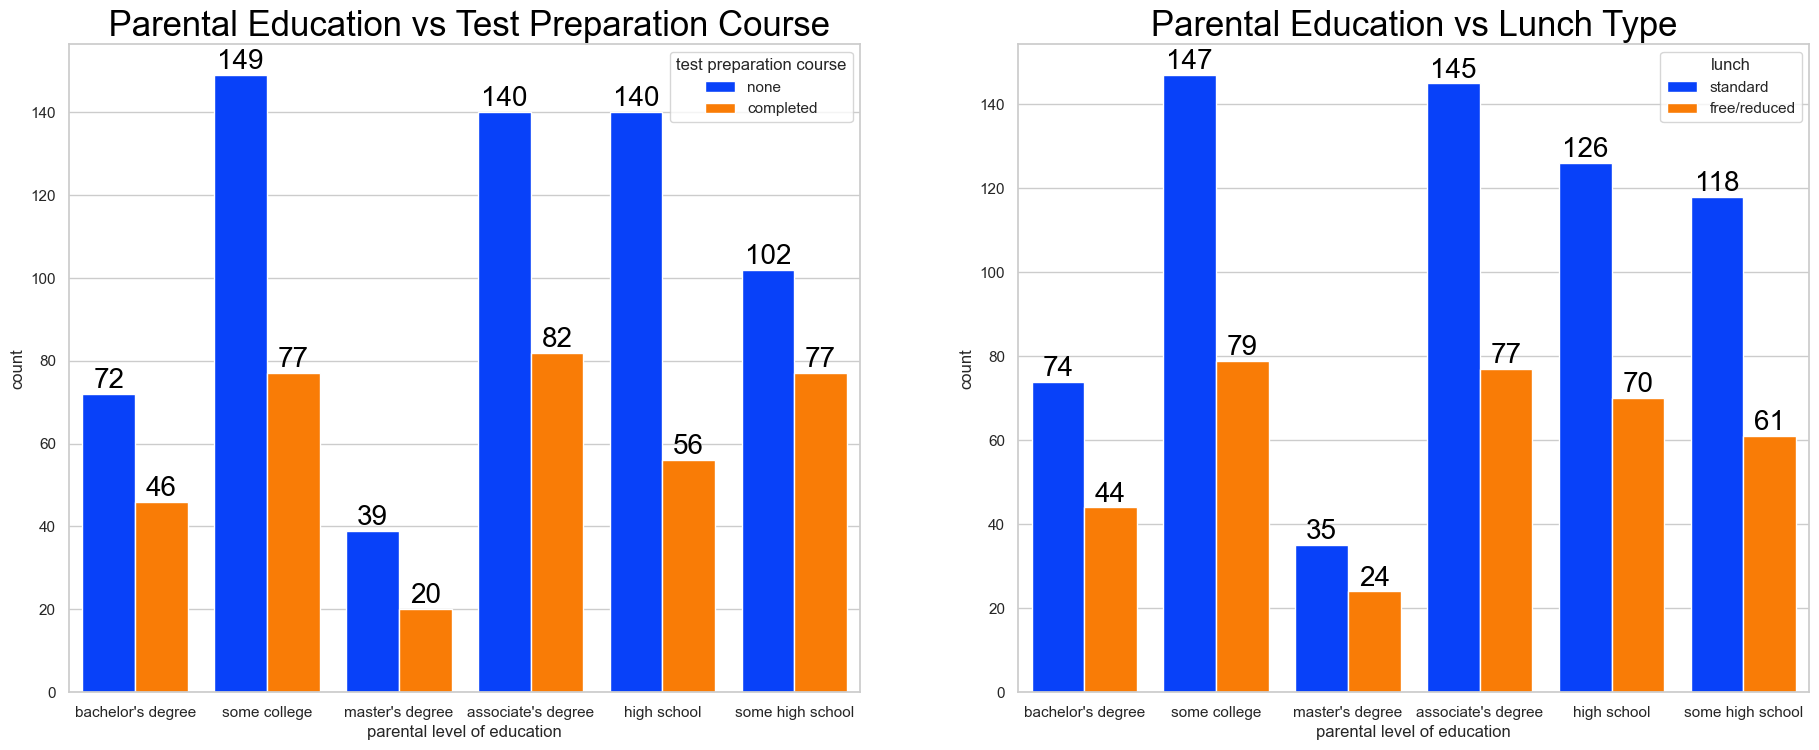

In [36]:
# Create subplots with 1 row and 2 columns
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Parental level of education vs Test Preparation Course
sns.countplot(
    x=df['parental level of education'],
    data=df,
    palette='bright',
    hue='test preparation course',
    saturation=0.95,
    ax=ax[0]
)
ax[0].set_title(' Parental Education vs Test Preparation Course', color='black', fontsize=25)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', fontsize=20)

# Plot 2: Parental level of education vs Lunch
sns.countplot(
    x=df['parental level of education'],
    data=df,
    palette='bright',
    hue='lunch',
    saturation=0.95,
    ax=ax[1]
)
ax[1].set_title('Parental Education vs Lunch Type', color='black', fontsize=25)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', fontsize=20)




# Insights: Parental Education vs Test Preparation & Lunch Type

## Plot 1: Parental Education vs Test Preparation Course

1. **Low Completion Rate Across All Groups**  
   Most students did **not complete** the test preparation course, regardless of their parents’ education level.

2. **Highest Participation in 'Some College' and 'Associate's Degree' Groups**  
   These two groups have the highest number of students overall, but still show a **higher count of non-completion**.

3. **Higher Parental Education Does Not Guarantee Prep Completion**  
   Even students with highly educated parents (Bachelor’s/Master’s) show **low completion**, indicating other influencing factors such as **awareness, access, or motivation**.

---

## Plot 2: Parental Education vs Lunch Type

1. **Higher Parental Education Linked to Standard Lunch**  
   Students with parents holding higher education degrees are **more likely to receive standard lunch**, suggesting **better economic background**.

2. **Free/Reduced Lunch More Common in Lower Education Groups**  
   Students from families with only high school or some high school education **have higher counts of free/reduced lunch**, pointing to **economic challenges**.

3. **Lunch Type Reflects Socioeconomic Status**  
   The distribution shows a **strong correlation** between **parental education and economic status**, which may influence overall **student well-being and performance**.

---

## Conclusion

- **Test preparation support** should be offered across all education backgrounds, not just to low-education families.
- **Economic and educational background** are both key factors that can impact a student's access to resources and academic success.
- These patterns should be considered while building **fair and effective models or educational interventions**.
vs Test Preparation & Lunch Type


  

## 4.2.5 TEST PREPARATION COLUMN

- DOES TEST PREPARATION COLUMN HAS ANY IMPACT ON STUDEN'S PERFORMANCE

## BIVARIATE ANALYSIS(DOES TEST PRPARATION COLUMN HAS ANY IMPACT ON STUDENT'S PERFORMANCE)

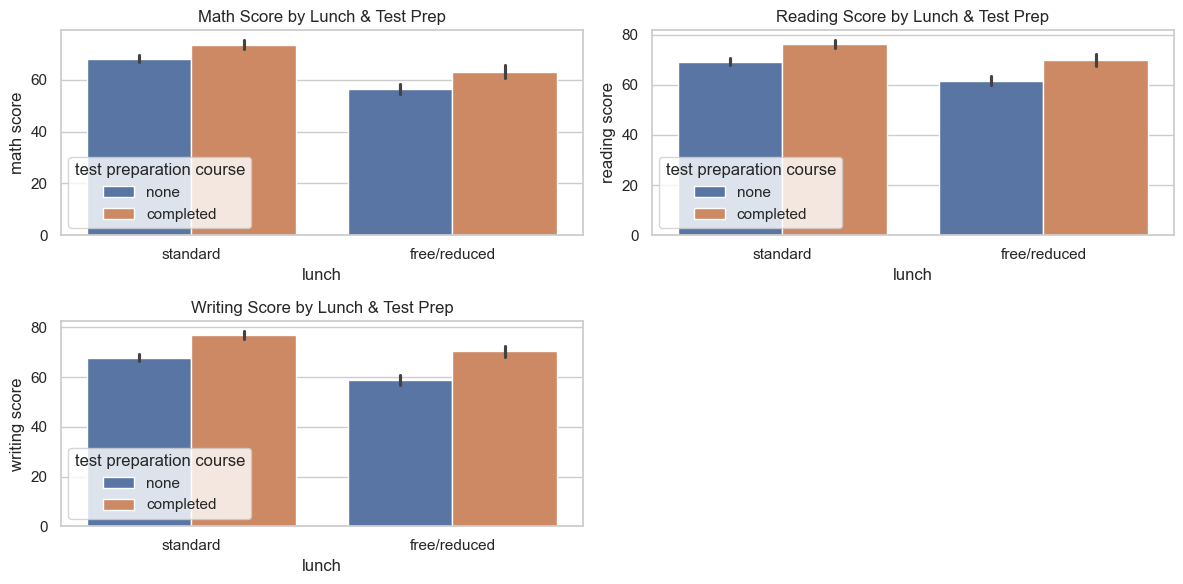

In [37]:
# Set the overall figure size
plt.figure(figsize=(12, 6))

# Plot 1: Math Score by Lunch Type and Test Preparation
plt.subplot(2, 2, 1)
sns.barplot(x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.title('Math Score by Lunch & Test Prep')

# Plot 2: Reading Score by Lunch Type and Test Preparation
plt.subplot(2, 2, 2)
sns.barplot(x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.title('Reading Score by Lunch & Test Prep')

# Plot 3: Writing Score by Lunch Type and Test Preparation
plt.subplot(2, 2, 3)
sns.barplot(x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])
plt.title('Writing Score by Lunch & Test Prep')

# Improve layout spacing
plt.tight_layout()
plt.show()


# Insights: Lunch Type & Test Preparation Course vs Academic Scores

## Overview
The following plots compare student performance in **math**, **reading**, and **writing** based on their **lunch type** (standard vs. free/reduced) and whether they **completed the test preparation course**.

---

## Key Insights

1. **Students who completed the test preparation course consistently scored higher** in all three subjects, regardless of lunch type.
   - This suggests that the preparation course has a **positive impact on academic performance**.

2. **Students with standard lunch performed better than those with free/reduced lunch** in most cases.
   - This indicates a possible link between **economic background** (inferred from lunch type) and academic outcomes.

3. **The performance gap is most noticeable in math scores**, where students with both standard lunch and completed test prep scored the highest.

4. **Test prep completion helps close the performance gap**, especially for students on free/reduced lunch.
   - This highlights the value of the test preparation program as a tool for **educational equity**.

---

## Conclusion

Both **economic factors** (lunch type) and **academic support** (test preparation) significantly affect student performance.  
Investing in **access to test preparation**—especially for economically disadvantaged students—can help improve overall performance and reduce inequality.


## 4.2.6 CHECKING OUTLIERS

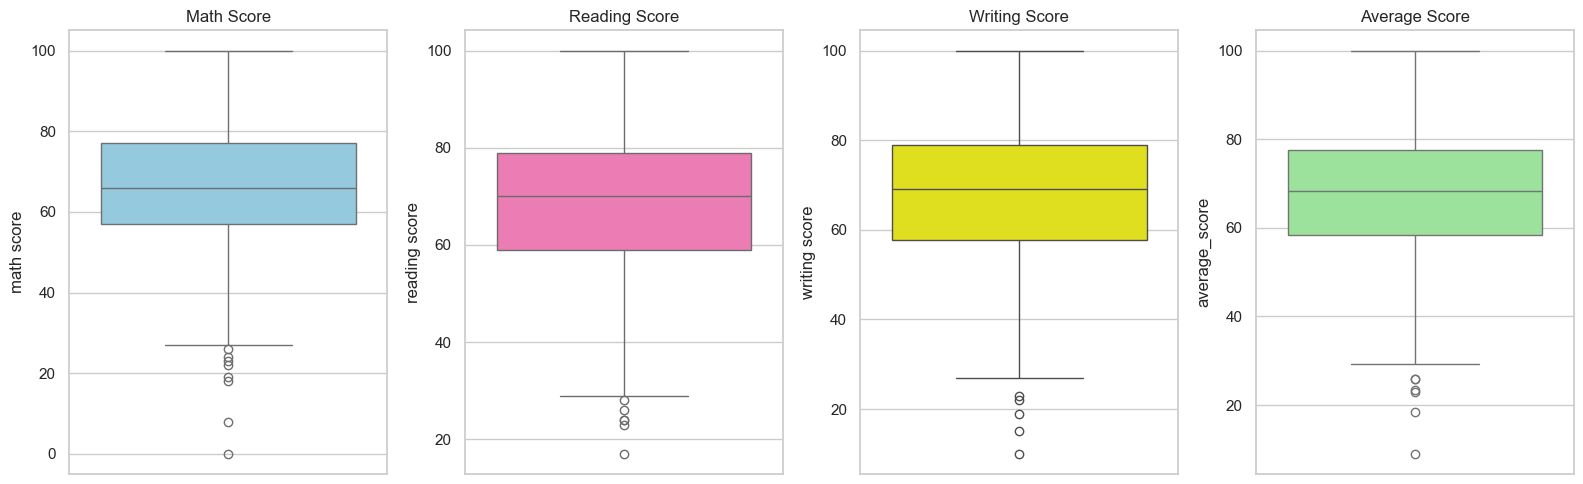

In [40]:
# 4.4.6 Checking Outliers

plt.subplots(1, 4, figsize=(16, 5))

# Math score boxplot
plt.subplot(1, 4, 1)
sns.boxplot(y=df['math score'], color='skyblue')
plt.title('Math Score')

# Reading score boxplot
plt.subplot(1, 4, 2)
sns.boxplot(y=df['reading score'], color='hotpink')
plt.title('Reading Score')

# Writing score boxplot
plt.subplot(1, 4, 3)
sns.boxplot(y=df['writing score'], color='yellow')
plt.title('Writing Score')

# Average score boxplot
plt.subplot(1, 4, 4)
sns.boxplot(y=df['average_score'], color='lightgreen')
plt.title('Average Score')

plt.tight_layout()
plt.show()


# Insights: Outlier Detection in Academic Scores

## Purpose  
Boxplots are used to identify **outliers**—values that fall significantly outside the typical range—in students' **math**, **reading**, **writing**, and **average scores**.

---

## Key Observations

1. **Presence of Outliers in All Subjects**  
   Each score category (math, reading, writing) shows a few **data points beyond the whiskers**, indicating outliers exist in the dataset.

2. **Math Scores Show Slightly More Variability**  
   Compared to reading and writing, the **math score boxplot** appears to have a wider spread and slightly more extreme outliers.

3. **Average Scores Are More Stable**  
   The **average score boxplot** shows a relatively compact range with **fewer visible outliers**, indicating consistent overall performance despite subject-specific differences.

4. **No Severe Skewness**  
   All distributions appear to be fairly **symmetrical**, suggesting that the scoring data is generally well-behaved and balanced.

---

## Conclusion

Outliers exist in all score categories, particularly in math.  
These outliers should be reviewed carefully, as they may represent:
- **Genuine top or struggling performers**, or  
- **Data entry errors** that may need to be corrected before modeling.

It's important to decide whether to **keep, cap, or remove** these outliers depending on the project goals (e.g., fairness, accuracy, or generalization in model training).


## 4.2.7 MULTVARIATE ANALYSIS USING PAIRPLOT

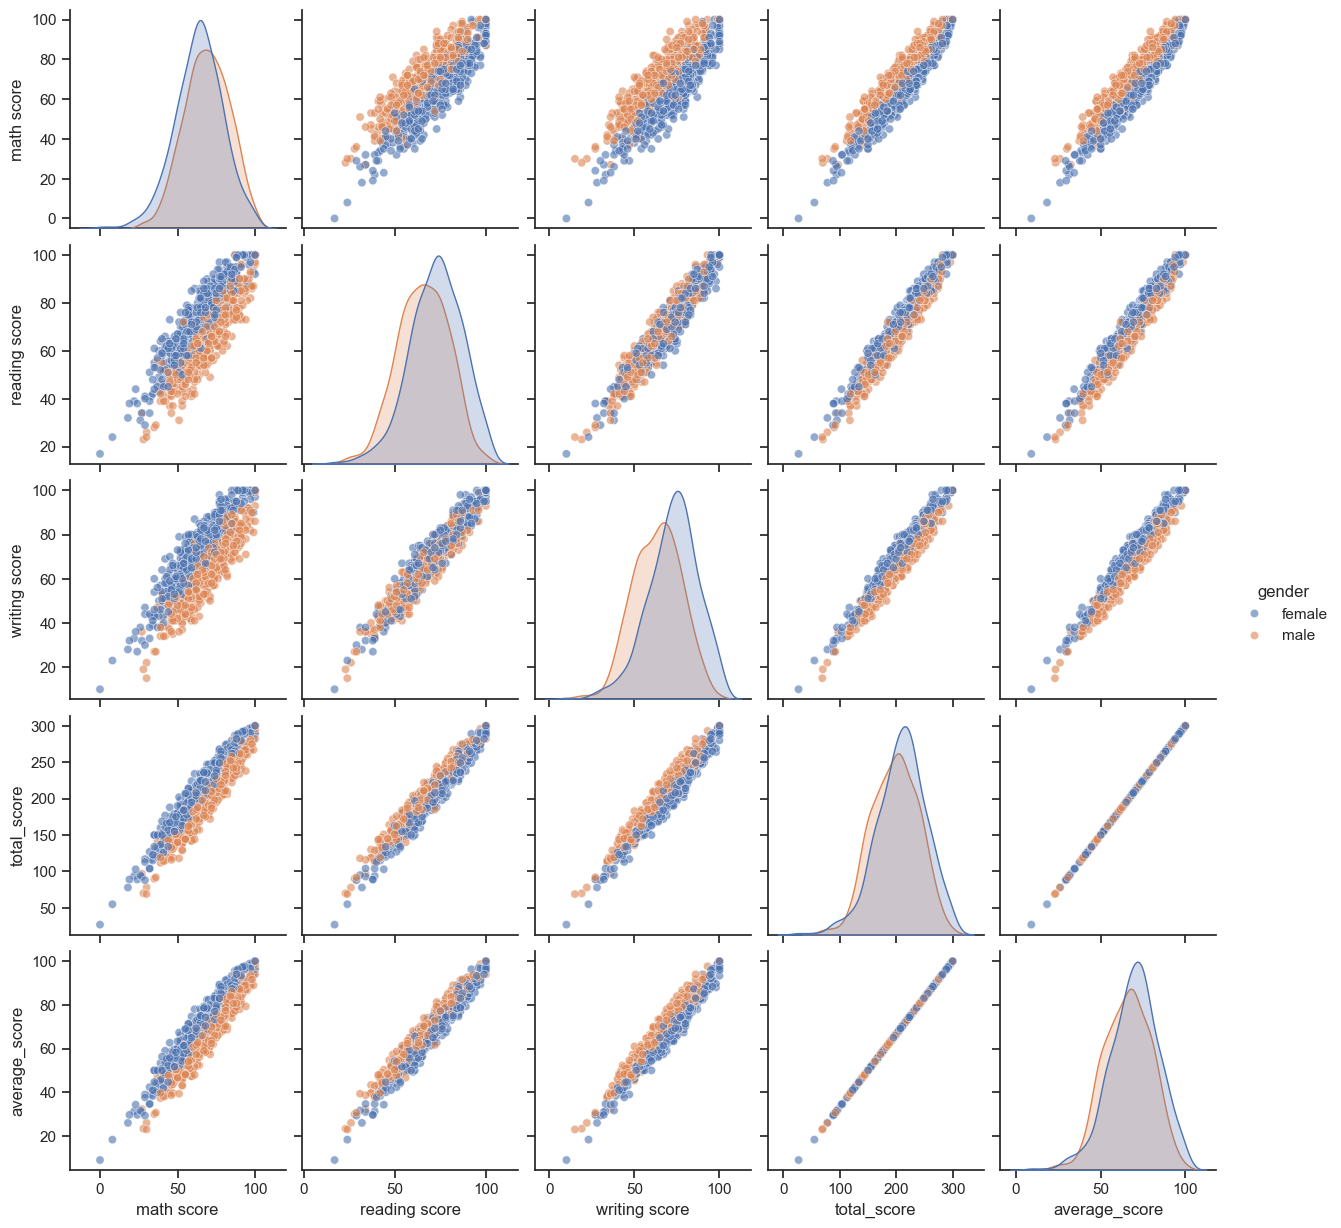

In [48]:
# Set a clean visual style for the plots
sns.set(style="ticks")  # "ticks" gives a clean axis look with ticks on all sides

# Create pairwise scatterplots of all numerical variables
# Each point is colored by the 'gender' column
sns.pairplot(
    data=df,         # The dataset to visualize
    hue='gender',    # Color-code the points based on gender ('male' or 'female')
         
    plot_kws={'alpha': 0.6}  # Make dots slightly transparent for better overlap visibility
)

# Display the plot
plt.show()

# Insights: Pairplot Analysis by Gender

This visualization shows how students' scores in **math, reading, and writing** relate to each other, grouped by **gender**.

---

##  Key Takeaways

1. **Positive Correlation Between All Subjects**  
   Students who perform well in one subject usually do well in the others.

2. **Gender Score Trends**  
   - **Female students** tend to perform slightly better in **reading** and **writing**.
   - **Male students** have a slight edge in **math**, but the difference is small.

3. **No Strong Separation by Gender**  
   The data shows **overlap between genders** in all subjects. So, gender alone doesn't clearly divide performance.

---

##  Why It Matters

These patterns help us understand how subjects are linked and whether gender plays a role in performance.  
While small differences exist, **performance varies more by individual than by gender**.




## 4.3 CONCLUSION

## 📌 Summary: Student Performance Analysis

**Project Objective:**  
Assess how demographic and socioeconomic factors influence student performance across math, reading, and writing.

---

## Key Insights

- **Parental Education:**  
  Students with **Bachelor’s or Master’s degrees** show consistently higher scores.

- **Test Preparation:**  
  Students who completed a prep course performed **significantly better** in all subjects.

- **Lunch Type (Socioeconomic Indicator):**  
  Those with **standard lunch** scored higher than those with **free/reduced lunch**, suggesting a link between nutrition/economic status and academic performance.

- **Subject Performance:**  
  Students excel more in **reading and writing** than in **math**, which has the most outliers and variability.

- **Gender Trends:**  
  **Female students** outperform males in overall and subject-wise scores, though both show similar distribution patterns.

- **Race/Ethnicity Influence:**  
  - **Groups D & E** perform best.  
  - **Group A** shows lower scores, indicating potential need for targeted academic support.

---

## Recommended Actions

- **Expand test preparation programs**, especially for students from underrepresented or economically challenged backgrounds.

- **Implement math-focused interventions** to address widespread underperformance.

- **Use lunch type and parental education levels** to guide **resource allocation** and personalized support strategies.

- **Target support initiatives for Group A** to promote academic equity across race/ethnic demographics.

---

**Note:** These insights are based on 1000 student records with complete data and no duplicates or missing values. Visual analyses confirm key patterns across demographics and subjects.
